In [1]:
import numpy as np
import pandas as pd

# Define 60 comments and their corresponding sentiment labels
comments = [
    "I absolutely loved this product!",  # Very Positive
    "This is the best experience I've had.",  # Very Positive
    "It's okay, not great but not terrible.",  # Neutral
    "I'm not satisfied with this service.",  # Negative
    "This is the worst product I have ever bought.",  # Very Negative
    "Just an average performance.",  # Neutral
    "Really happy with my purchase!",  # Positive
    "I'm disappointed, expected better.",  # Negative
    "This exceeded my expectations!",  # Very Positive
    "Terrible experience, will not return.",  # Very Negative
    "Fantastic quality and service!",  # Very Positive
    "Mediocre at best, not worth it.",  # Negative
    "Highly recommend this to everyone!",  # Very Positive
    "I regret buying this item.",  # Negative
    "This product is decent but not amazing.",  # Neutral
    "Absolutely terrible, I hate it!",  # Very Negative
    "Superb! I would buy it again.",  # Very Positive
    "This is just fine, nothing special.",  # Neutral
    "Very happy with my purchase, thanks!",  # Positive
    "It's not good, I wouldn't recommend.",  # Negative
    "What a delightful surprise!",  # Very Positive
    "The quality is lacking, very disappointed.",  # Negative
    "It was an average experience, I suppose.",  # Neutral
    "Really enjoyed it, would buy again.",  # Positive
    "It didn't meet my expectations.",  # Negative
    "I love it! Perfect for my needs.",  # Very Positive
    "Not impressed, won't buy again.",  # Negative
    "Such an amazing product!",  # Very Positive
    "It's just okay, I've seen better.",  # Neutral
    "Waste of money, I'm very upset.",  # Very Negative
    "Great value for the price!",  # Positive
    "This product is a game changer!",  # Very Positive
    "I don't like this at all.",  # Negative
    "Satisfied with my experience.",  # Positive
    "Everything was alright, no complaints.",  # Neutral
    "I'm so glad I found this!",  # Very Positive
    "Would not recommend to anyone.",  # Very Negative
    "It's just average, nothing more.",  # Neutral
    "An incredible experience overall!",  # Very Positive
    "Not what I expected, very disappointing.",  # Negative
    "I am thrilled with this product!",  # Very Positive
    "Not what I expected.",  # Negative
    "An average experience, nothing special.",  # Neutral
    "I really hate this!",  # Very Negative
    "This is an outstanding service!",  # Very Positive
    "Perfectly satisfied with my purchase.",  # Positive
    "This product did not meet my standards.",  # Negative
    "What a fantastic deal!",  # Very Positive
    "Just a mediocre product.",  # Neutral
    "I can't believe how bad this is.",  # Very Negative
    "I would definitely buy this again!",  # Very Positive
    "Not worth the hype.",  # Negative
    "It has some great features!",  # Positive
    "This was a disappointing experience.",  # Negative
    "I'm absolutely delighted with it!",  # Very Positive
    "I didn't like this at all.",  # Negative
    "This is a reliable product.",  # Positive
    "It's not bad, but I've had better.",  # Neutral
    "I had a great time using this!",  # Very Positive
    "I'm very unsatisfied with my order."  # Very Negative
]

sentiments = [
    4,  # Very Positive
    4,  # Very Positive
    2,  # Neutral
    1,  # Negative
    0,  # Very Negative
    2,  # Neutral
    3,  # Positive
    1,  # Negative
    4,  # Very Positive
    0,  # Very Negative
    4,  # Very Positive
    1,  # Negative
    4,  # Very Positive
    1,  # Negative
    2,  # Neutral
    0,  # Very Negative
    4,  # Very Positive
    2,  # Neutral
    3,  # Positive
    1,  # Negative
    4,  # Very Positive
    1,  # Negative
    2,  # Neutral
    3,  # Positive
    1,  # Negative
    4,  # Very Positive
    1,  # Negative
    4,  # Very Positive
    2,  # Neutral
    0,  # Very Negative
    3,  # Positive
    4,  # Very Positive
    1,  # Negative
    3,  # Positive
    2,  # Neutral
    4,  # Very Positive
    0,  # Very Negative
    2,  # Neutral
    4,  # Very Positive
    1,  # Negative
    4,  # Very Positive
    1,  # Negative
    2,  # Neutral
    0,  # Very Negative
    4,  # Very Positive
    3,  # Positive
    1,  # Negative
    4,  # Very Positive
    2,  # Neutral
    0,  # Very Negative
    4,  # Very Positive
    1,  # Negative
    3,  # Positive
    1,  # Negative
    4,  # Very Positive
    1,  # Negative
    3,  # Positive
    2,  # Neutral
    4,  # Very Positive
    0   # Very Negative
]

# Create a DataFrame
df = pd.DataFrame({'comment': comments, 'sentiment': sentiments})

# Check lengths
print(f"Length of comments: {len(df['comment'])}")  # Should be 60
print(f"Length of sentiments: {len(df['sentiment'])}")  # Should be 60

# Verify lengths of the lists
assert len(df['comment']) == len(df['sentiment']), "Mismatch in length of comments and sentiments."

# Display the first few rows of the DataFrame
df.head()

Length of comments: 60
Length of sentiments: 60


,comment,sentiment
0,I absolutely loved this product!,4
1,This is the best experience I've had.,4
2,"It's okay, not great but not terrible.",2
3,I'm not satisfied with this service.,1
4,This is the worst product I have ever bought.,0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Create a mapping for sentiment labels
sentiment_mapping = {
    0: "Very Negative",
    1: "Negative",
    2: "Neutral",
    3: "Positive",
    4: "Very Positive"
}

# Add sentiment labels to the DataFrame
df['sentiment_label'] = df['sentiment'].map(sentiment_mapping)

# Display the first few rows of the updated DataFrame
print(df[['comment', 'sentiment', 'sentiment_label']].head())

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment_label'].value_counts().sort_index()

# Display the counts
print("\nSentiment Counts:")
print(sentiment_counts)

                                         comment  sentiment sentiment_label
0               I absolutely loved this product!          4   Very Positive
1          This is the best experience I've had.          4   Very Positive
2         It's okay, not great but not terrible.          2         Neutral
3           I'm not satisfied with this service.          1        Negative
4  This is the worst product I have ever bought.          0   Very Negative

Sentiment Counts:
sentiment_label
Negative         15
Neutral          11
Positive          8
Very Negative     8
Very Positive    18
Name: count, dtype: int64


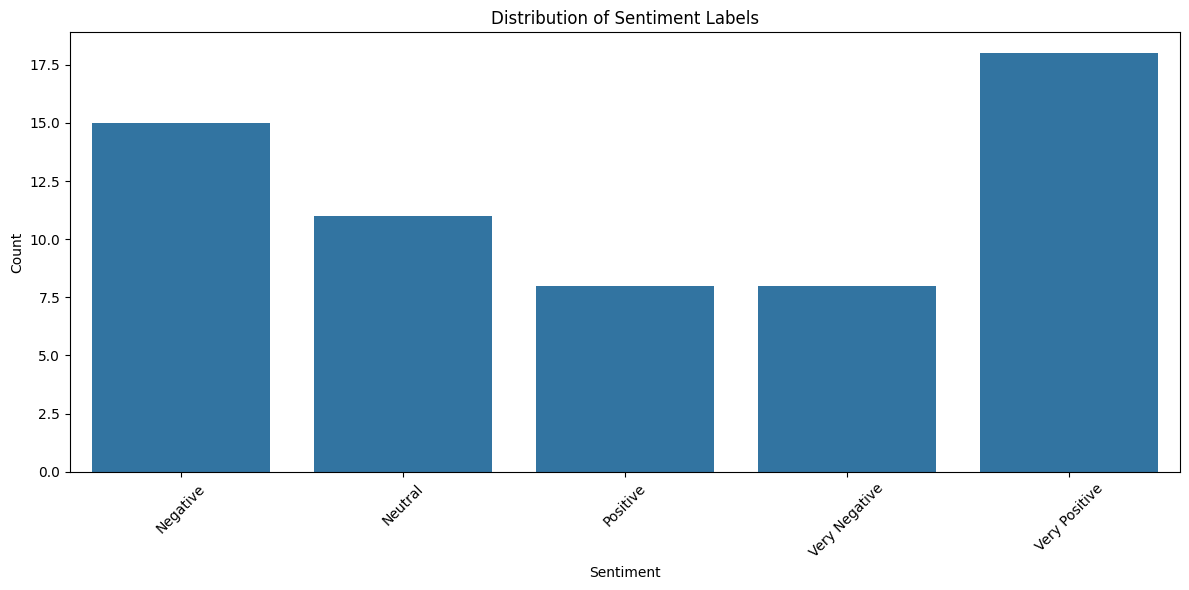

In [3]:
# Visualize the sentiment distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment_label', data=df, order=sentiment_counts.index)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# 1. Data preprocessing
max_words = 8000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['comment'])
sequences = tokenizer.texts_to_sequences(df['comment'])
X = pad_sequences(sequences, maxlen=max_len)

le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [5]:
# 2. Building and training the RNN model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = model.fit(X_train, y_train, epochs=70, batch_size=45, validation_split=0.3,  verbose=1)


Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1622 - loss: 1.6123 - val_accuracy: 0.2353 - val_loss: 1.6080
Epoch 2/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.3243 - loss: 1.6033 - val_accuracy: 0.3529 - val_loss: 1.6054
Epoch 3/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4595 - loss: 1.5934 - val_accuracy: 0.2941 - val_loss: 1.6015
Epoch 4/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.5135 - loss: 1.5872 - val_accuracy: 0.2353 - val_loss: 1.5974
Epoch 5/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.4324 - loss: 1.5790 - val_accuracy: 0.2353 - val_loss: 1.5932
Epoch 6/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.2973 - loss: 1.5796 - val_accuracy: 0.2353 - val_loss: 1.5897
Epoch 7/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.3243 - loss: 1.5504 - val_accuracy: 0.2353 - val_loss: 1.5862
Epoch 8/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.3784 - loss: 1.5529 - val_accuracy: 0.2353 - val_loss: 1.5825
Epoch 

In [6]:
# 3. Evaluating the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=sentiment_mapping.values()))
print("Accuracy:", accuracy_score(y_test, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step

Classification Report:
               precision    recall  f1-score   support

Very Negative       0.00      0.00      0.00         1
     Negative       0.00      0.00      0.00         1
      Neutral       0.50      1.00      0.67         1
     Positive       0.00      0.00      0.00         1
Very Positive       0.25      0.50      0.33         2

     accuracy                           0.33         6
    macro avg       0.15      0.30      0.20         6
 weighted avg       0.17      0.33      0.22         6

Accuracy: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


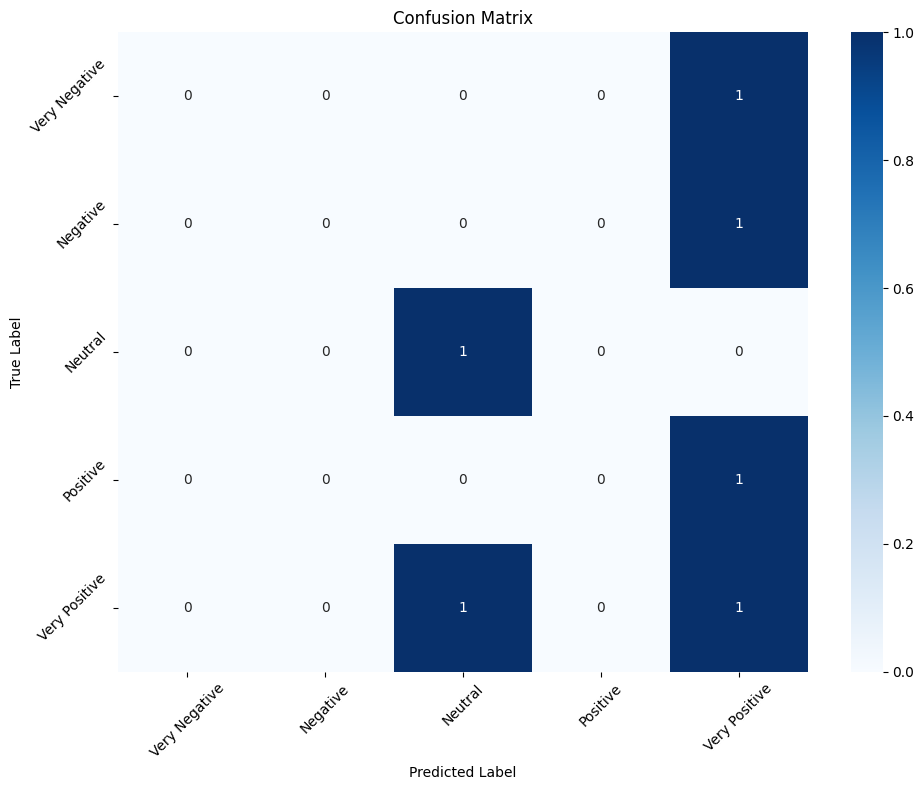

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_mapping.values(), yticklabels=sentiment_mapping.values())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

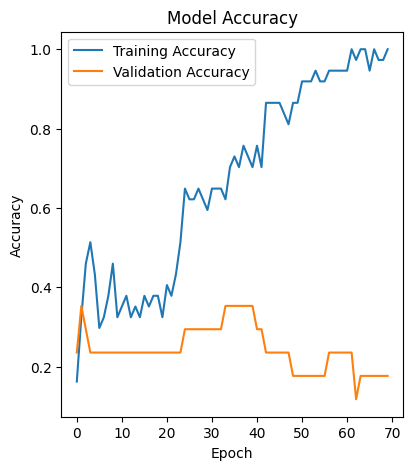

In [8]:
# Training history
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

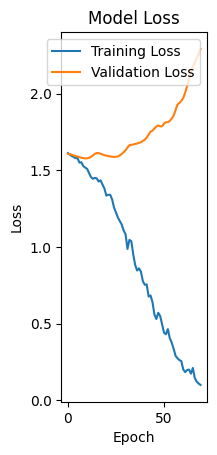

In [9]:
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

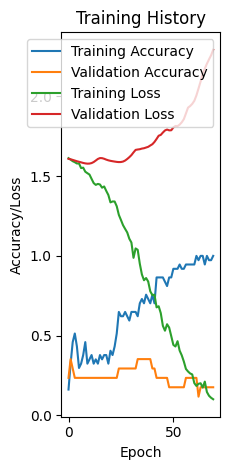

In [10]:
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Sentiment mapping (make sure this matches the mapping used during training)
sentiment_mapping = {
    0: "Very Negative",
    1: "Negative",
    2: "Neutral",
    3: "Positive",
    4: "Very Positive"
}

# 4. Testing with 10 new comments
new_comments = [
    "This product is amazing!",
    "I'm not happy with my purchase.",
    "It's an okay product, nothing special.",
    "Worst experience ever!",
    "Decent quality for the price.",
    "I absolutely love it!",
    "Not worth the money.",
    "Average performance, as expected.",
    "Exceeded all my expectations!",
    "I'm returning this immediately."
]

new_sequences = tokenizer.texts_to_sequences(new_comments)
new_X = pad_sequences(new_sequences, maxlen=max_len)

new_predictions = model.predict(new_X)
new_pred_classes = np.argmax(new_predictions, axis=1)
new_pred_labels = [sentiment_mapping[i] for i in new_pred_classes]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


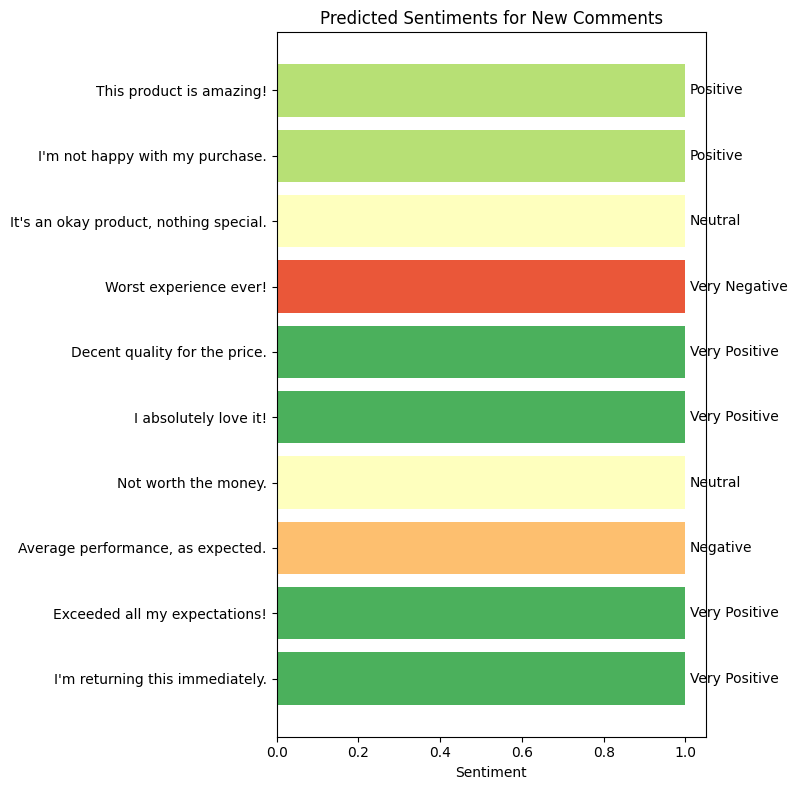

In [12]:
# 5. Visualizing results for new comments
plt.figure(figsize=(8, 8))
colors = sns.color_palette("RdYlGn", n_colors=5)
color_map = {label: color for label, color in zip(sentiment_mapping.values(), colors)}

for i, (comment, sentiment) in enumerate(zip(new_comments, new_pred_labels)):
    plt.barh(i, 1, color=color_map[sentiment])
    plt.text(1.01, i, sentiment, va='center')

plt.yticks(range(len(new_comments)), new_comments)
plt.title('Predicted Sentiments for New Comments')
plt.xlabel('Sentiment')
plt.gca().invert_yaxis()  # Invert y-axis to show comments in original order
plt.tight_layout()
plt.show()


In [13]:
# Print predictions
for comment, sentiment in zip(new_comments, new_pred_labels):
    print(f"Comment: {comment}")
    print(f"Predicted Sentiment: {sentiment}\n")

Comment: This product is amazing!
Predicted Sentiment: Positive

Comment: I'm not happy with my purchase.
Predicted Sentiment: Positive

Comment: It's an okay product, nothing special.
Predicted Sentiment: Neutral

Comment: Worst experience ever!
Predicted Sentiment: Very Negative

Comment: Decent quality for the price.
Predicted Sentiment: Very Positive

Comment: I absolutely love it!
Predicted Sentiment: Very Positive

Comment: Not worth the money.
Predicted Sentiment: Neutral

Comment: Average performance, as expected.
Predicted Sentiment: Negative

Comment: Exceeded all my expectations!
Predicted Sentiment: Very Positive

Comment: I'm returning this immediately.
Predicted Sentiment: Very Positive



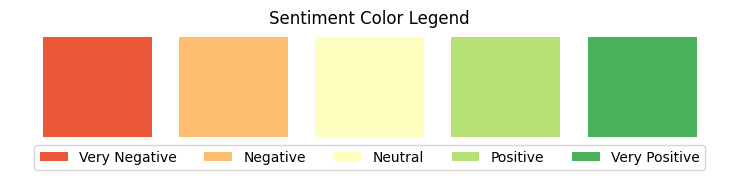

In [14]:
# Optional: Display color legend
plt.figure(figsize=(8, 2))
for i, (sentiment, color) in enumerate(color_map.items()):
    plt.bar(i, 1, color=color, label=sentiment)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.axis('off')
plt.title('Sentiment Color Legend')
plt.tight_layout()
plt.show()

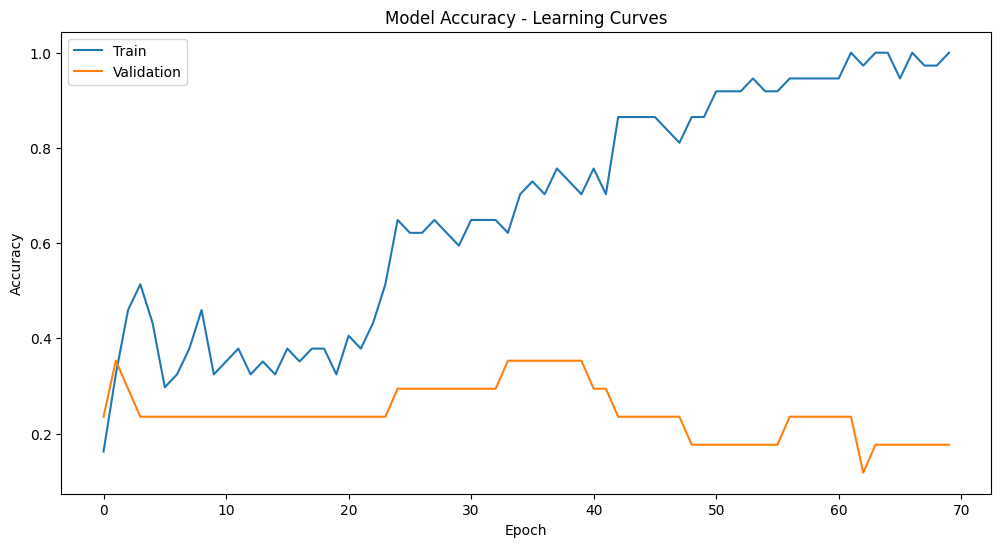

In [15]:
# 6. Additional Analysis: Learning Curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - Learning Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# 7. Model Summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,074,961 (7.92 MB)

 Trainable params: 691,653 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,383,308 (5.28 MB)

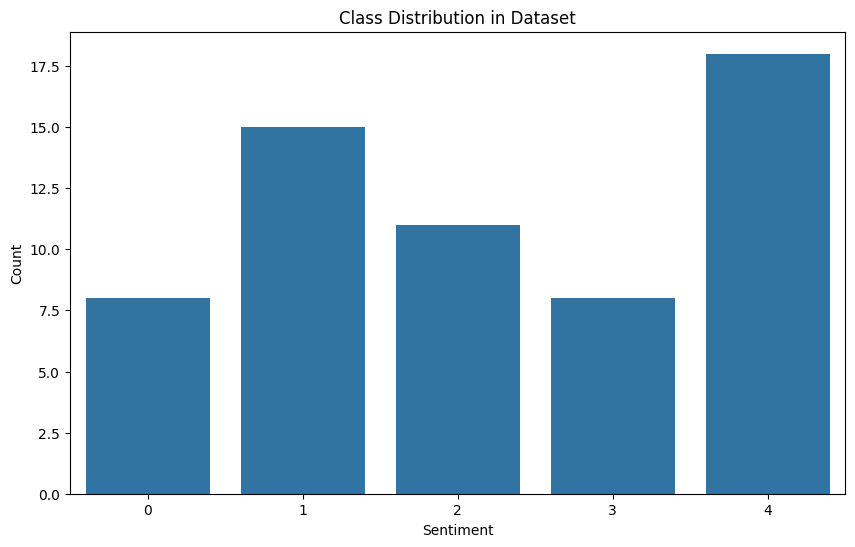

In [ ]:
# 8. Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution in Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()